# ex-01 Prepare Global Map 

The global map data could be downloaded from https://gadm.org/download_world.html. You can also download this version as six separate layers (one for each level of subdivision/aggregation), as a [geopackage](https://geodata.ucdavis.edu/gadm/gadm4.1/gadm_410-levels.zip) database.

The zipped data is about 2.5 GB.

In [1]:
import numpy as np
import pandas as pd 
import fiona
import geopandas as gpd

from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

## Read data

In [2]:
infile = r"data/gadm_410-levels.gpkg"

***Check the level or layers in the data***

Geopandas will defaultly read the first layer. As we do not know the names of all layer with geopandas, it is difficult to select the target layer. So we use fiona to check the layer information.

In [3]:
for layername in fiona.listlayers(infile):
    with fiona.open(infile, layer=layername) as src:
        print(layername, len(src))

ADM_0 263
ADM_1 3662
ADM_2 47217
ADM_3 144193
ADM_4 153410
ADM_5 51427


***Only care about the level 1 - ADM_1***

In [4]:
gdf_map = gpd.read_file(infile, layer='ADM_1')

In [5]:
gdf_map.head()

,GID_0,COUNTRY,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,AFG,Afghanistan,AFG.1_1,Badakhshan,Badahšan,NA,Velayat,Province,NA,AF.BD,NA,"MULTIPOLYGON (((71.11366 35.97130, 71.10155 35..."
1,AFG,Afghanistan,AFG.2_1,Badghis,Badghes|Badghisat|Badgis,NA,Velayat,Province,NA,AF.BG,AF-BDG,"MULTIPOLYGON (((63.76845 34.52948, 63.75823 34..."
2,AFG,Afghanistan,AFG.3_1,Baghlan,Baglan|Bughlan,NA,Velayat,Province,NA,AF.BL,AF-BGL,"MULTIPOLYGON (((68.05261 35.08151, 68.03890 35..."
3,AFG,Afghanistan,AFG.4_1,Balkh,Balh|Mazar-i-Sharif|Mazar,NA,Velayat,Province,NA,AF.BK,AF-BAL,"MULTIPOLYGON (((67.11067 36.00776, 67.14209 35..."
4,AFG,Afghanistan,AFG.5_1,Bamyan,NA,NA,Velayat,Province,NA,AF.BM,AF-BAM,"MULTIPOLYGON (((67.30598 34.38105, 67.32777 34..."


***Have a quick visualization***

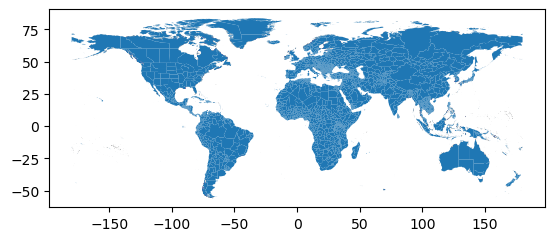

In [6]:
gdf_map.plot()

## Save data

The global map contain many properties. We remove redundant information to only keep three properties of provincial administrative name (State), country name (Country), and geometry (polygons). Then save the data to the Parquet format, which is a popular columnar storage format to store geospatial vector data (point, lines, polygons) in Apache Parquet and has faster reading and writing speed than the Shapefile format.

- extract columns of interest
- save data to geoparquet format

In [7]:
df_states = gdf_map[['COUNTRY', 'NAME_1', 'geometry']]
df_states = df_states.rename({'NAME_1': "State", 'COUNTRY': 'Country'}, axis=1)
df_states[['Country', 'State', 'geometry']].to_parquet('data/gadm404_Level1.parquet')

In [8]:
df_states.head()

,Country,State,geometry
0,Afghanistan,Badakhshan,"MULTIPOLYGON (((71.11366 35.97130, 71.10155 35..."
1,Afghanistan,Badghis,"MULTIPOLYGON (((63.76845 34.52948, 63.75823 34..."
2,Afghanistan,Baghlan,"MULTIPOLYGON (((68.05261 35.08151, 68.03890 35..."
3,Afghanistan,Balkh,"MULTIPOLYGON (((67.11067 36.00776, 67.14209 35..."
4,Afghanistan,Bamyan,"MULTIPOLYGON (((67.30598 34.38105, 67.32777 34..."
